## Guardar una imagen desde un 'arreglo' de datos e imprimir esos datos para mostrar la imagen

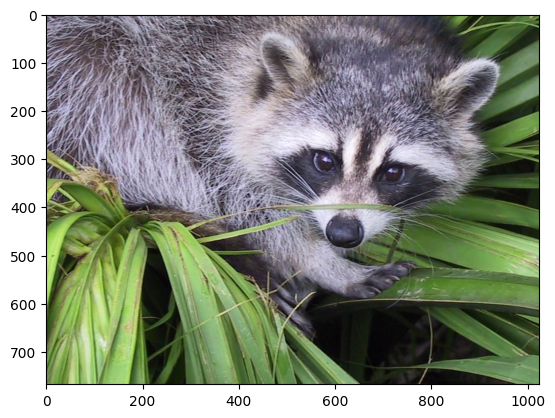

In [1]:
# from scipy import misc
from scipy import datasets
import imageio

# Cargar una imagen de ejemplo
#f = misc.face()
# La libreria sugiere utilizar los datasets
f = datasets.face()

# misc.imsave('face.png', f) # deprecada y eliminada de versiones posteriores a la 1.2.0
# Guardar la imagen utilizando imageio.imwrite
imageio.imwrite('./static/face.png', f)

# muestra la imagen cargada
import matplotlib.pyplot as plt
plt.imshow(f)
plt.show()

La funcion scipy.misc.imsave se encuentra deprecada desde la version 1.0.0 de la libreria scipy, como alternativa se sugiere usar `imageio`

https://stackoverflow.com/questions/49686013/using-skimage-to-replace-scipy-misc-imread

https://docs.scipy.org/doc/scipy-1.1.0/reference/generated/scipy.misc.imread.html


## Cargar una imagen de un archivo

In [2]:
# Anteriormente se guardo la imagen del racoon en el archivo 'face.png'

# Para leer ese imagen utilizamos imageio como reemplazo de misx.imread
import imageio
face = imageio.v2.imread('./static/face.png')
print(f'Tipo de objeto: {type(face)}')
print(f'Forma: {face.shape}, Tipo de dato de la imagen: {face.dtype}')

Tipo de objeto: <class 'numpy.ndarray'>
Forma: (768, 1024, 3), Tipo de dato de la imagen: uint8


dtype es uint8 porque puede almacenar datos de 8 bits (valores de 0 a 255)

## Leyendo archivo .raw y cambiando la forma de los datos

- .raw: es un formato binario que no incluye ningún tipo de cabecera o encabezado para almacenar información sobre la imagen (como la resolución, profundidad de color, etc.). Solo contiene los datos de la imagen, normalmente en forma de una secuencia de bytes. Por lo tanto, **es necesario conocer de antemano las dimensiones y el formato de la imagen para interpretarla correctamente después de leer el archivo.**

    Incluye los datos sin comprimir ni procesar, por lo que son archivos de gran tamaño y sin perdida de calidad.

https://www.adobe.com/mx/creativecloud/file-types/image/raw.html#:~:text=Un%20archivo%20RAW%20est%C3%A1%20formado,y%20sin%20p%C3%A9rdida%20de%20calidad.

In [3]:
import numpy as np

# Guarda la imagen en un archivo .raw
face.tofile('./static/face.raw')

# Lee la imagen desde el archivo .raw como un array plano (1D)
face_from_raw = np.fromfile('./static/face.raw', dtype=np.uint8)
print(f'Antes {face_from_raw.shape}')

# Reconstruye la forma original de la imagen
# imagen de 768 pixeles de alto, 1024 de ancho y 3 canales de color
face_from_raw.shape = (768, 1024, 3)
print(f'Despues {face_from_raw.shape}')

Antes (2359296,)
Despues (768, 1024, 3)


para informacion muy grande se puede utilizar np.memmap para mapear la memoria
- permite cargar el archivo pero sin guardar todos los datos en memoria
- permite no saturar la memoria RAM con un archivo muy grande

In [4]:

face_memmap = np.memmap('./static/face.raw', dtype=np.uint8, shape=(768, 1024, 3))

## Mostrar imagenes con matplotlib.pyplot

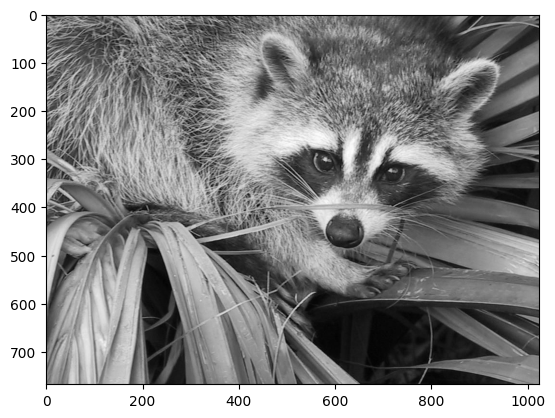

In [5]:
f = datasets.face(gray=True)

# Prepara y configura la visualización de la imagen
plt.imshow(f, cmap=plt.cm.gray)
# Se asegura de que la imagen (u otros gráficos) se muestren en una ventana interactiva.
plt.show()

vmin y vmax para ajustar el contraste
valores menores a 30 se colocaran como el valor mas oscuro
valores mayores a 200 se colocaran como el valor mas claro

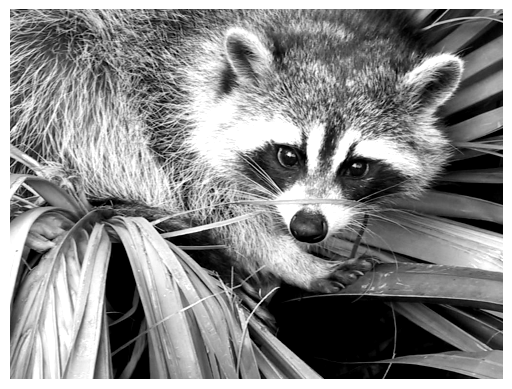

In [6]:
plt.imshow(f, cmap=plt.cm.gray, vmin=30, vmax=200)
plt.axis('off')
plt.show()

plt.contour puede ser utilizada para trazar contornos basados en los valores de intensidad de píxeles en una imagen en escala de grises o en una matriz de datos que representa la imagen.

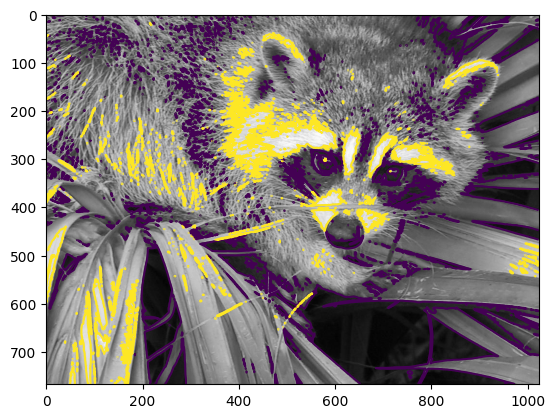

In [7]:
plt.imshow(f, cmap=plt.cm.gray)
plt.contour(f, [50, 200])
plt.show()

## Transformaciones geometricas de imagenes

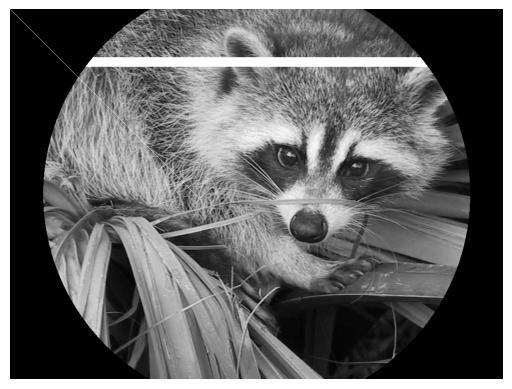

In [8]:
#Cargamos la imagen en escala de grisis
face = datasets.face( gray = True )
face[ 0, 40 ] #Accedemos al valor de un pixel en especifico (en este caso fila 0 columna 40)

face[ 10:13, 20:23 ] #Extrea una submatriz de la imagen, en este caso, filas de la 10 a la 12 y columnas de 20 a 22
face[ 100:120 ] = 255 #Establece los pixeles de la fila 100 a 119 en 255, valor máximo de una imagen en escala de grises. ( blanco )

lx, ly = face.shape #Se obtiene las dimensiones de la imagen
X, Y = np.ogrid[0:lx, 0:ly] #Se crean dos matrices de coordenadas 'x' y 'y'
mask = (X - lx / 2) ** 2 + (Y - ly / 2) ** 2 > lx * ly / 4 #Matriz booleana para defirnir un circulo centrado en la imagen.

face[ mask ] = 0 #Se establece el valor de los pixeles que están fuera del circulo de la mascara a 0 volviendo esa parte en negro.

face[range(400), range(400)] = 255 #Se establece el valor de los pixeles que están en las diagonales de la matriz en 255, creando una línea diagonal blanca desde la
                                   #esquina superior izquierda hasta la esquina inferior derecha.

#Se imprime la imagen final
plt.imshow(face, cmap='gray')
plt.axis('off')  # Opcional: oculta los ejes
plt.show()

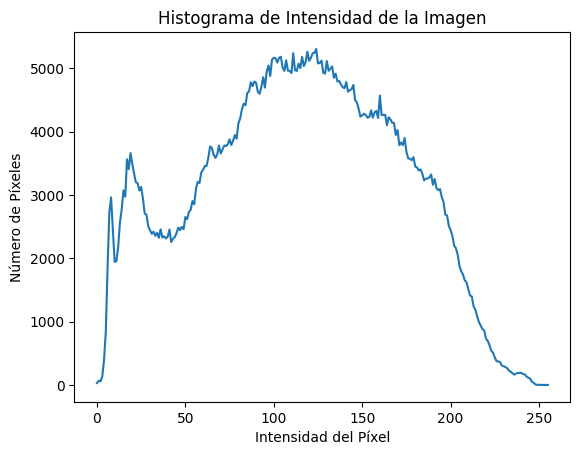

In [9]:
import numpy as np
#Cargamos la imagen en escala de grisis
face = datasets.face( gray = True )
face.mean() #Calcula el valor promodeio de los pixeles de la imagen, para dar una ide del brillo promedio de la imagen.

face.max(), face.min() #Obtiene el valor maximo y minimo de los pixeles de la imagen con respecto al brillo.

hist,bins= np.histogram(face, 256,[0,256]) #Se calcula el histograma de la imagen para demostrar la distribucion de intensidades de pixeles de la imagen.

#Muestra del histograma
plt.plot(bins[:-1], hist)  # bin_edges[:-1] es el centro de los bins
plt.title('Histograma de Intensidad de la Imagen')
plt.xlabel('Intensidad del Píxel')
plt.ylabel('Número de Píxeles')
plt.show()

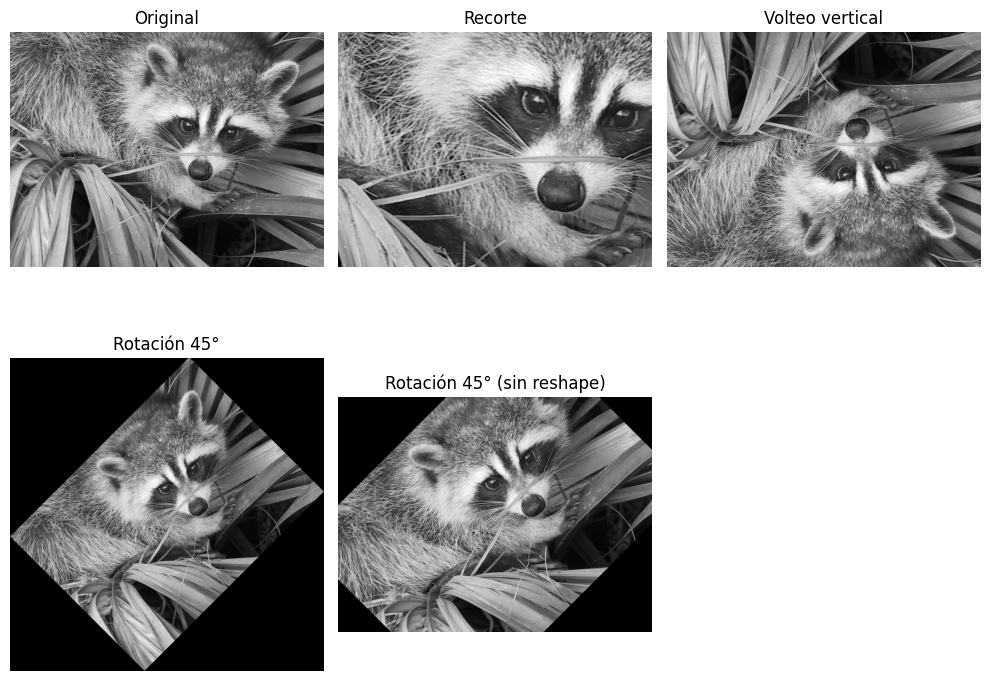

In [10]:
from scipy import ndimage
#Cargamos la imagen en escala de grisis
face = datasets.face( gray = True )

lx, ly = face.shape # Se obtiene las dimensiones de la imagen.

crop_face = face[lx // 4: - lx // 4, ly // 4: - ly // 4] #Se recorta la iamgen original para eliminar una banda de pixeles en los bordes, obteniendo una imagen de un 50% de la original.

flip_ud_face = np.flipud(face) # Se voltea la imagen verticalmente. Los píxeles en la parte superior se moverán a la parte inferior y viceversa, creando un efecto de espejo en el eje horizontal.

rotate_face = ndimage.rotate(face, 45) # Rota la imagen 45 grados en sentido antihorario.
rotate_face_noreshape = ndimage.rotate(face, 45, reshape=False) # Igual que la anterior, pero la imagen rotada mantendrá el mismo tamaño que la imagen original,
                                                                # lo que puede llevar a que algunas partes de la imagen rotada queden recortadas si no encajan perfectamente en el nuevo ángulo.

# Mostrar imágenes
plt.figure(figsize=(10, 8))

plt.subplot(2, 3, 1)
plt.title('Original')
plt.imshow(face, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title('Recorte')
plt.imshow(crop_face, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title('Volteo vertical')
plt.imshow(flip_ud_face, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.title('Rotación 45°')
plt.imshow(rotate_face, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.title('Rotación 45° (sin reshape)')
plt.imshow(rotate_face_noreshape, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()